# Assignment 1 : Data Management

# Introduction:
In this project, we analyze the leading causes of death in the US from 1999 to 2016 using pandas in python. In addition to investigating trends in the leading causes of death in the US over time and answering some specific questions, we also try to speculate on additional information that can be gleaned by analysing the available data.


# Data:
We have used two different sources of information in this project. The first dataset is the publicly available health information by The National Center for Health Statistics (NCHS) that contains the information on leading causes of death for every state in the US from 1999 to 2016 and the second dataset is the Census data of the United States containing the population data for the US split by states from 2010 to 2018.

We have done a basic data cleaning process for both the datasets including dropping the columns and rows containing redundant information or the information irrelevant with respect to the questions asked. We explore the first dataset containing the leading causes of death in the US in detail and supplement the relevant information from the second dataset containing the population data, wherever necessary.

We start by importing the required libraries and the leading causes of death dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
myfile = "/Users/nehaawasthi/Downloads/BANA.680.01 - Data Mgmt for Business Anlyts - 10152022 - 448 PM/NCHS_-_Leading_Causes_of_Death__United_States.csv"
file = open(myfile, 'r')
df = pd.read_csv(file)

Let's do some basic data exploration

In [3]:
# Check the first 5 rows  of the dataframe
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [4]:
# Check the last 5 rows of the dataframe
df.tail()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10291,2001,All Causes,All causes,District of Columbia,5951,1049.9
10292,2002,All Causes,All causes,Mississippi,28853,1051.6
10293,2000,All Causes,All causes,Mississippi,28654,1051.9
10294,2000,All Causes,All causes,District of Columbia,6001,1061.2
10295,1999,All Causes,All causes,District of Columbia,6076,1087.3


In [5]:
# Check the shape of the dataframe
df.shape

(10296, 6)

In [6]:
# Check the number of unique values for each variable
df.nunique()

Year                         18
113 Cause Name               11
Cause Name                   11
State                        52
Deaths                     5741
Age-adjusted Death Rate    2419
dtype: int64

In [7]:
# Check the column-wise info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10296 non-null  int64  
 1   113 Cause Name           10296 non-null  object 
 2   Cause Name               10296 non-null  object 
 3   State                    10296 non-null  object 
 4   Deaths                   10296 non-null  int64  
 5   Age-adjusted Death Rate  10296 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.8+ KB


In [8]:
# check the type of data for each column
df.dtypes

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object

In [9]:
# print out the names of the columns
df.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

Now that we have basic information about our dataframe, let's start manipulating it to answer the questions

In [10]:
# We start by making a copy of the dataframe which we can manipulate
df1 = df.copy()

# Change the format to show the numerical values upto four decimal points
pd.options.display.float_format = '{:.4f}'.format
df1.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6000
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7000
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8000
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8000
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1000


It looks like "113 Cause Name" & "Cause Name" carry the same information so let's do a check

In [11]:
# Check the unique values for "113 Cause Name" against "Cause Name"
dfu = df1.groupby('Cause Name')['113 Cause Name'].unique()
dfu

Cause Name
All causes                                                      [All Causes]
Alzheimer's disease                              [Alzheimer's disease (G30)]
CLRD                          [Chronic lower respiratory diseases (J40-J47)]
Cancer                                       [Malignant neoplasms (C00-C97)]
Diabetes                                       [Diabetes mellitus (E10-E14)]
Heart disease                  [Diseases of heart (I00-I09,I11,I13,I20-I51)]
Influenza and pneumonia                  [Influenza and pneumonia (J09-J18)]
Kidney disease             [Nephritis, nephrotic syndrome and nephrosis (...
Stroke                                  [Cerebrovascular diseases (I60-I69)]
Suicide                    [Intentional self-harm (suicide) (*U03,X60-X84...
Unintentional injuries     [Accidents (unintentional injuries) (V01-X59,Y...
Name: 113 Cause Name, dtype: object

As suspected, both columns carry the same information so let's simplify our dataframe further by dropping redundant and irrelevant columns

In [12]:
# Drop columns "113 Cause Name" & "Age -adjusted Death Rate"
df1.drop(['113 Cause Name', 'Age-adjusted Death Rate'], axis = 1, inplace = True)
df1.head()

,Year,Cause Name,State,Deaths
0,2012,Kidney disease,Vermont,21
1,2016,Kidney disease,Vermont,30
2,2013,Kidney disease,Vermont,30
3,2000,Suicide,District of Columbia,23
4,2014,Kidney disease,Arizona,325


In [13]:
# Let's get summary statistics for our numerical variable
df2 = df1[['Deaths']].dropna(axis=0)
df2.describe()

,Deaths
count,10296.0000
mean,15367.9328
std,112145.6780
min,21.0000
25%,606.0000
50%,1704.5000
75%,5678.0000
max,2744248.0000


Let's see our dataframe using multi-indexed variables, first grouped by the year, then by cause name and finally by the state name to see the total death count.

In [14]:
df3 = df1.groupby(['Year', 'Cause Name', 'State']).agg(Deaths = ('Deaths', 'sum'))
df3.head()

Deaths
Year Cause Name State             
1999 All causes Alabama      44806
                Alaska        2708
                Arizona      40050
                Arkansas     27925
                California  229380

We see that the death for "all causes" Slightly exceeds the sum of deaths for the 10 leading causes mentioned here. So, they include the counts of all the causes mentioned here and some others that are not deemed important for this dataset. 

In [15]:
# For the total death count for the United States per year, let's select the rows for only 'All causes' in the United States
df_AC = df1.loc[df1['Cause Name'] == "All causes"]
df_US_AC = df_AC.loc[df_AC['State'] == "United States"]
df_US_AC = df_US_AC.reset_index(drop = True)
df_US_AC.head()

,Year,Cause Name,State,Deaths
0,2014,All causes,United States,2626418
1,2016,All causes,United States,2744248
2,2013,All causes,United States,2596993
3,2012,All causes,United States,2543279
4,2015,All causes,United States,2712630


Let's import the second dataset containing the population data

In [16]:
# Import the excel dataset while dropping the top multi-indexed rows and columns for the census estimates and data for april 2010
myfile1 = "/Users/nehaawasthi/Downloads/BANA.680.01 - Data Mgmt for Business Anlyts - 10152022 - 448 PM/nst-est2018-01.xlsx"
df5 = pd.read_excel(myfile1,
                   skiprows = [0,1,2],
                   usecols=[0,3,4,5,6,7,8,9,10,11])

# Drop the rows containing no or irrelevant information about the population in different regions
df5 = df5[df5.isnull().sum(axis=1) < 2]
df5.tail()

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018
52,.Washington,6742902.0000,6821655.0000,6892876.0000,6962906.0000,7052439.0000,7163543.0000,7294680.0000,7425432.0000,7535591.0000
53,.West Virginia,1854214.0000,1856074.0000,1856764.0000,1853873.0000,1849467.0000,1841996.0000,1830929.0000,1817048.0000,1805832.0000
54,.Wisconsin,5690479.0000,5704755.0000,5719855.0000,5736952.0000,5751974.0000,5761406.0000,5772958.0000,5792051.0000,5813568.0000
55,.Wyoming,564483.0000,567224.0000,576270.0000,582123.0000,582548.0000,585668.0000,584290.0000,578934.0000,577737.0000
57,Puerto Rico,3721525.0000,3678732.0000,3634488.0000,3593077.0000,3534874.0000,3473166.0000,3406495.0000,3325001.0000,3195153.0000


In [17]:
# Rename the columns appropriately 
df5.columns = ['State', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
df5.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,309326085.0000,311580009.0000,313874218.0000,316057727.0000,318386421.0000,320742673.0000,323071342.0000,325147121.0000,327167434.0000
1,Northeast,55380645.0000,55600532.0000,55776729.0000,55907823.0000,56015864.0000,56047587.0000,56058789.0000,56072676.0000,56111079.0000
2,Midwest,66974749.0000,67152631.0000,67336937.0000,67564135.0000,67752238.0000,67869139.0000,67996917.0000,68156035.0000,68308744.0000
3,South,114867066.0000,116039399.0000,117271075.0000,118393244.0000,119657737.0000,121037542.0000,122401186.0000,123598424.0000,124753948.0000
4,West,72103625.0000,72787447.0000,73489477.0000,74192525.0000,74960582.0000,75788405.0000,76614450.0000,77319986.0000,77993663.0000


In [18]:
# Convert Years to a column for merging the dataframes later and plot the likelihood of death over time
df6 = pd.melt(df5, id_vars=["State"],var_name="Year", value_name= "Population", value_vars=[2010, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
df6.head()

,State,Year,Population
0,United States,2010,309326085.0000
1,Northeast,2010,55380645.0000
2,Midwest,2010,66974749.0000
3,South,2010,114867066.0000
4,West,2010,72103625.0000


In [19]:
# Group the dataframe by years and states to see total population per state per year
df7 = df6.groupby(['Year', 'State']).agg(Population = ('Population', 'sum'))
df7.head()

Population
Year State                    
2010 .Alabama     4785448.0000
     .Alaska       713906.0000
     .Arizona     6407774.0000
     .Arkansas    2921978.0000
     .California 37320903.0000

In [20]:
# Create a new dataframe that has the population data only for the United States so that we can calculate the yearly likelihood of death in the country
df_US = df6.loc[df6['State'] == "United States"]
df_US = df_US.reset_index(drop = True)
df_US.head()

,State,Year,Population
0,United States,2010,309326085.0000
1,United States,2011,311580009.0000
2,United States,2012,313874218.0000
3,United States,2013,316057727.0000
4,United States,2014,318386421.0000


To calculate the likelihood of death over the years later, We will group the original dataframe by years and get the sum total of deaths in that year to be merged with the population data from the second datset.

In [21]:
# Group the dataframes by year and calculate the sum total for deaths and population respectively
df11 = df_US_AC.groupby(['Year']).agg(Deaths = ('Deaths', 'sum'))
df12 = df_US.groupby(['Year']).agg(Population = ('Population', 'sum'))

In [22]:
# merge the two dataframes containing the total deaths and population in the US indexed by the year
merged_df = pd.merge(df11, df12,  how='inner', on = ['Year'])
merged_df.head()

,Deaths,Population
Year,,
2010,2468435,309326085.0000
2011,2515458,311580009.0000
2012,2543279,313874218.0000
2013,2596993,316057727.0000
2014,2626418,318386421.0000


### Are Americans facing increasing, decreasing, or steady likelihood of death?

To answer this question, we create a new variable called "Likelihood" for the merged dataframe which will calculate the number of deaths per year over the total population of the United States.

In [23]:
merged_df['Likelihood']=merged_df['Deaths']/merged_df['Population']
merged_df

,Deaths,Population,Likelihood
Year,,,
2010,2468435,309326085.0000,0.0080
2011,2515458,311580009.0000,0.0081
2012,2543279,313874218.0000,0.0081
2013,2596993,316057727.0000,0.0082
2014,2626418,318386421.0000,0.0082
2015,2712630,320742673.0000,0.0085
2016,2744248,323071342.0000,0.0085


It seems that the likelihood of death in America is steadily increasing over time.
Let's plot the same

<Figure size 432x288 with 0 Axes>

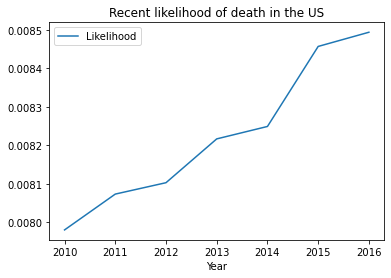

In [24]:
# Plot a linegraph to show the trend of likelihood of death over the years
plt.figure()
merged_df.plot(y='Likelihood', use_index=True) 
plt.title('Recent likelihood of death in the US')
plt.show()

The Graph shows a steady increase in the likelihood of death from 2010 to 2016 (the time for which we have data available from both datasets). We can see that there was a slightly sharper rise in the likelihood of death in the year 2014-2015 but it flattened again from 2015-2016.

We address the above question considering the yearly death count, with respect to the annual estimate of the resident population.

Based on our analysis, We can see that there there was a steady increase in the likelihood of death year over year. The likelihood of death increased from 0.80% in the year 2010 to 0.85% in the year 2016. Hence, we can say that the available data seems to suggest that Americans are facing an increasing likelihood of death.

Our analysis is restricted for the years 2010-2016 due to the limited availability of resident population estimates.

Additionally, it should be noted that we have used the population data to standardize the likelihood of death so that we can compare the deaths across different states and years without worrying about the variation in the population skewing our outcome. We speculate that 'Age-adjusted death rate' is another variable in the first dataset that was probably standardized using the population data.

Let's manipulate the leading causes of deaths dataframe to enable us to answer the rest of the questions.


In [25]:
#Create a dataframe just for the US
us_data = df1.loc[df1["State"] == "United States"]
us_data = us_data.reset_index(drop = True)

#drop 'All causes' from the us_data dataframe
drop_aC =us_data[us_data["Cause Name"].apply(lambda x: x.startswith("All causes"))].index
us_data.drop(drop_aC, inplace = True)

#Group by 'Cause Name', get the sum total of deaths for the top 4 options
us_data = us_data.groupby("Cause Name", as_index = False)["Deaths"].agg("sum").nlargest(4,"Deaths")

#Sort by deaths in the descending order
us_data = us_data.sort_values("Deaths", ascending = False).reset_index(drop = True)
us_data

,Cause Name,Deaths
0,Heart disease,11575183
1,Cancer,10244536
2,Stroke,2580140
3,CLRD,2434726


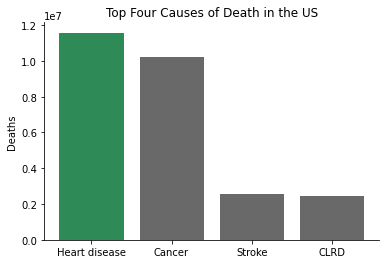

In [26]:
# plot the outcome
fig, ax = plt.subplots()
bars = ax.bar(us_data["Cause Name"], us_data["Deaths"], align='center', color = 'dimgrey')
bars[0].set_color('seagreen')
ax.set_ylabel('Deaths')
ax.set_title('Top Four Causes of Death in the US')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(top=False , bottom= True, left=True, right= False, labelleft='on', labelbottom='on')
plt.show()

### What are the four leading causes of death for Americans?

For this question, we have considered the leading causes of death for the years 1999-2016. 
For 17 years, the United States has seen an aggregate death count of 90m for all causes of death. 
Heart disease, Cancer, Stroke and Chronic Lower Respiratory Disease (CLRD) top the list as the major four causes of death, aggregating to a total of 23m, 20m, 5m, and 5m deaths respectively. 
Apart from these, unintentional injuries, Alzheimer’s disease, and Diabetes were other major causes of death.

In order to answer the other questions, let's manipulate the dataframe again


### Do individual states show the same four leading causes of death?

To answer this question, we will start by getting the unique data values for all the states.

In [27]:
#Drop the rows for 'All causes' to avoid duplication and adulteration of data 
drop_all_causes =df1[df1["Cause Name"].apply(lambda x: x.startswith("All causes"))].index
df1.drop(drop_all_causes, inplace = True)

# Drop the rows for "United States" to get the data just for all the states
drop_us = df1[df1["State"].apply(lambda x: x.startswith("United States"))].index
df21 = df1.drop(drop_us)
df21.head()

,Year,Cause Name,State,Deaths
0,2012,Kidney disease,Vermont,21
1,2016,Kidney disease,Vermont,30
2,2013,Kidney disease,Vermont,30
3,2000,Suicide,District of Columbia,23
4,2014,Kidney disease,Arizona,325


In [28]:
#Group by State and then 'Cause Name' to get the sum total of deaths by State
df31 = df21.groupby(["State","Cause Name"], as_index = False)["Deaths"].agg("sum")

#Sort the deaths in ascending order to get the States in alphabetical order
df41 = df31.sort_values(by = ["State","Deaths"], ascending = True, kind = "heapsort").reset_index(drop = True)
df41.head()

,State,Cause Name,Deaths
0,Alabama,Suicide,11241
1,Alabama,Influenza and pneumonia,18516
2,Alabama,Kidney disease,18899
3,Alabama,Diabetes,24143
4,Alabama,Alzheimer's disease,26637


In [29]:
#Concatenate slices of the top 4 causes for each state by taking every 6th-9th Index(Skip 10 rows) and gather them in one dataframe
df51 = pd.concat([df41[6::10],df41[7::10],df41[8::10],df41[9::10]], axis = 0)

#Sort the deaths in ascending order to get the States in alphabetical order
df51 = df51.sort_values(by = ["State","Deaths"], ascending = True, kind = "heapsort").reset_index(drop= True)
df51.head()

,State,Cause Name,Deaths
0,Alabama,CLRD,47778
1,Alabama,Stroke,51507
2,Alabama,Cancer,180780
3,Alabama,Heart disease,227433
4,Alaska,Stroke,3107


We see the top 4 leading causes of death per state in ascending order for the output.

In [30]:
#Get the count of the no. of times each Cause name is in the top four causes for individual regions
df51.value_counts(subset = "Cause Name")

Cause Name
Cancer                    51
Heart disease             51
Stroke                    42
CLRD                      39
Unintentional injuries    20
Alzheimer's disease        1
dtype: int64

In response to the question mentioned above, we note that while all individual states do not show the same 4 leading causes of death as the US, most states have heart disease, cancer, stroke, CLRD, or unintentional injuries as their top four leading causes of death, with unintentional injuries being on the rise in the recent years. 

Every state has heart disease and cancer in the top four causes. 
42 and 39 states had strokes and CLRD in the top four respectively.
North Dakota is the only state that has Alzheimer’s disease as one of the top four leading causes.
20 states, including New Mexico, South Carolina, and West Virginia had unintentional injuries as one of the top four leading causes of death.

### Are there year-by-year changes in the four leading causes of death nationwide?

We will answer this question with an approach similar to the previous question and get the unique data values per year.

In [31]:
#Group by Year and then 'Cause Name' to get the sum total of deaths per year
df61 = df21.groupby(["Year","Cause Name"], as_index = False)["Deaths"].agg("sum")

#Sort the deaths in ascending order to get the years in an ascending order from 1999 to 2016
df71 = df61.sort_values(by = ["Year","Deaths"], ascending = True, kind = "heapsort").reset_index(drop = True)
df71.head()

,Year,Cause Name,Deaths
0,1999,Suicide,29199
1,1999,Kidney disease,35525
2,1999,Alzheimer's disease,44536
3,1999,Influenza and pneumonia,63730
4,1999,Diabetes,68399


In [32]:
#Concatenate slices of the top 4 causes for each year by taking every 6th-9th Index(Skip 10 rows) and gather them in one dataframe
df81 = pd.concat([df71[6::10],df71[7::10],df71[8::10],df71[9::10]], axis = 0)

#Sort the deaths in ascending order to get the years in an ascending order from 1999 to 2016
df81 = df81.sort_values(by = ["Year","Deaths"], ascending = True, kind = "heapsort").reset_index(drop= True)
df81.head()

,Year,Cause Name,Deaths
0,1999,CLRD,124181
1,1999,Stroke,167366
2,1999,Cancer,549838
3,1999,Heart disease,725192
4,2000,CLRD,122009


We see the top 4 leading causes of death per year in ascending order for the output.

In [33]:
#Get the count of the no. of times each Cause name is in the top four causes for individual regions
df81.value_counts(subset = "Cause Name")

Cause Name
CLRD                      18
Cancer                    18
Heart disease             18
Stroke                    14
Unintentional injuries     4
dtype: int64

For the above mentioned question, our analysis revealed that heart disease, cancer, stroke, and CLRD consistently ranked as the top four leading causes of death until the year 2012. 

Heart disease topped as the leading cause of death every year, followed by cancer, stroke and CLRD respectively.

2013 onwards, we see a rise in deaths caused by unintentional injuries, which replaced stroke as one of the top four leading causes of death. 

# Additional Insights:

Although the available data can give us some valuable insights, we believe that some additional data could shed light on a few more observations including:

1) The year 2007 and 2008 saw a steep rise in the number of suicide cases. Additional data can be collected to find a link between the affects of the housing market crash and the total number of deaths caused by financial hardships.

2) From 2009 onward, the trajectory of deaths due to unintentional injuries positively increase at a steeper rate compared to the data from 1999-2008. Another link we could find is between the rise in social media apps influence and the increase in unintentional injuries. It overtakes stroke as a leading cause of death from 2013-2016, which could be due to people(especially youngsters) posing for photos and shooting videos and stunts that lead to accidental deaths. 

3) North Dakota is the only state in the dataset to have Alzheimer’s disease as a leading cause of death. This can probably be attributed to the higher concentration of the eldery people in the state. Additional data can be used to find a link between the two decisively.